[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jordisr/cellscape/blob/master/examples/cartoon.ipynb)

# Making molecular cartoons with CellScape

The following examples illustrate some of the types of visualizations that can be generated. Most workflows using the notebook interface will have the following steps:

* Make a `cellscape.Structure` object to read in atomic coordinates (PDB/mmCIF) and orient the molecule
* Call `Structure.outline()` to return a vector representation in the form of a `cellscape.Cartoon` object
* Call `Cartoon.plot()` to visualize, change styles/colors, and save output image to a file (svg/pdf/png/ps)

## 1. Space-filling protein outlines

In [1]:
# Check if notebook is running in a Google Colab environment
# if so we need to install cellscape and download some PDB examples
import sys
if 'google.colab' in sys.modules:
    ! pip install -r https://raw.githubusercontent.com/jordisr/cellscape/master/requirements.txt
    ! pip install git+https://github.com/jordisr/cellscape.git
    ! wget -r --no-parent https://github.com/jordisr/cellscape/tree/master/examples/ig
    ! wget -r --no-parent https://github.com/jordisr/cellscape/tree/master/examples/ceacam5

In [2]:
import cellscape

First we load the PDB structure into a new Structure object. Let's start with the antibody structure included in the CellScape examples folder.

In [3]:
protein = cellscape.Structure("ig/1igt.pdb")

If you're running on a local Jupyter notebook, you can open an NGLView window, which will allow you to rotate the PDB structure and choose the desired orientation for the 2D cartoon. *If you're on the Google Colab this won't do anything so skip to the next line.*

In [ ]:
protein.view

Instead of choosing the orientation interactively, we can also load in a rotation matrix saved previously and use that to make the cartoon.

In [5]:
protein.load_view_matrix("ig/view")

Now we can call the `outline` function, which projects atomics coordinates down to two dimensions and creates a space-filling outline. When run without arguments it will generate a single outline of the entire protein. The next sections contain examples of outlining every residue and every chain.

In [6]:
cartoon = protein.outline()

Outlined 1 polygons!


Once the protein has been outlined, we can see the result with the `plot` function. This will generate an image that can be exported if desired.

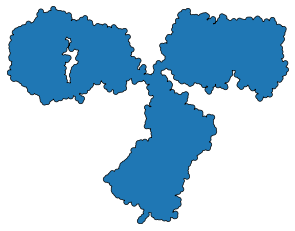

In [7]:
cartoon.plot()

If we don't like the default color scheme we can specify a different one for the plot (e.g. `colors=red`). To save the image we simply pass the filename to `plot`, with the extension determining the format (e.g. `save="test.pdf"`).

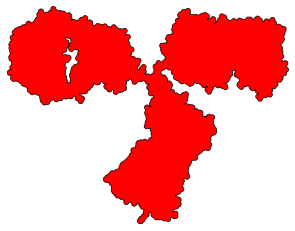

In [8]:
cartoon.plot(colors='red', save="test.pdf")

## 2. Striving for the [Goodsell](https://ccsb.scripps.edu/goodsell/) look

The above code generated a space-filling outline of the entire protein, but we may want to capture a little more atomic detail. The first argument of `outline` is what we want to be outlining on (e.g. outline every chain, outline every residue).

In [9]:
cartoon = protein.outline("residue")

Outlined 1302 polygons!


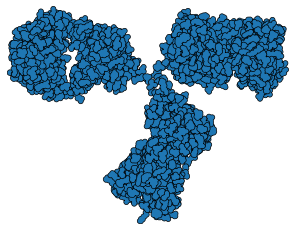

In [10]:
cartoon.plot()

Instead of coloring each residue in the protein uniformly, we can color based on some property, such as the chain ID.

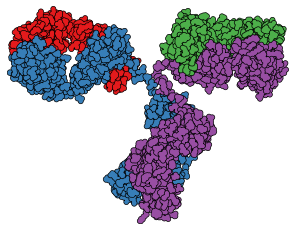

In [11]:
cartoon.plot(color_residues_by="chain")

To get a little closer to the illustrations done by David Goodsell, we can simulate effects of 3D lighting by using darker shades and thicker edges farther back from the camera.

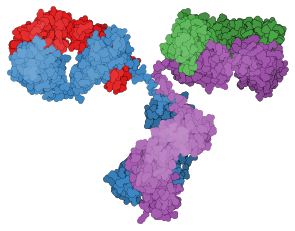

In [12]:
cartoon.plot(color_residues_by="chain", depth_shading=True, depth_lines=True)

## 3. Capturing depth with occlusion
One of CellScape's main features is to generate outlines separately for larger regions of the protein (e.g. chains). If UniProt information is provided, it can even outline based on annotated domains or topology (see section 4).

In [13]:
cartoon = protein.outline("chain")

Outlined 4 polygons!


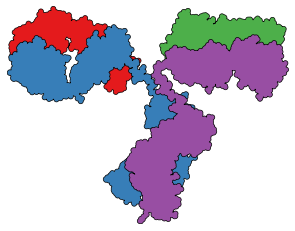

In [14]:
cartoon.plot()

This way each chain of the antibody is outlined in a different color, however the overlapping chains aren't quite correct, as part of the green chain should be crossing in front of the purple one. We can fix this with the depth option, which will correctly calculate the overlaps of the chains (which might take a little longer).

In [15]:
cartoon = protein.outline("chain", depth="flat")

Outlined 4 polygons!


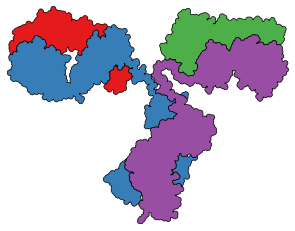

In [16]:
cartoon.plot()

Instead of a flat cartoon, we can also render the protein as a series of slices or contours in the Z direction (like a topographic map of a protein). This is selected with `depth="contours"` and the size of the interval can be specified with `depth_contour_interval` (the default is 3 &#8491;).

In [17]:
cartoon = protein.outline("chain", depth="contours", depth_contour_interval=10)

Outlined 22 polygons!


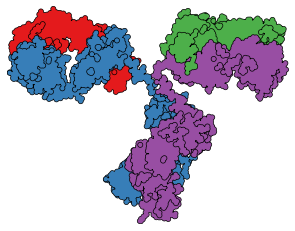

In [18]:
cartoon.plot()

For added style points let's add depth-based shading.

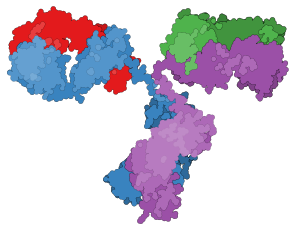

In [19]:
cartoon.plot(depth_shading=True, depth_lines=True)

## 4. Domain outlines using UniProt
The UniProt record for a protein (e.g. [P06731](https://www.uniprot.org/uniprot/P06731)) contains many sequence annotations, some of which can be parsed automatically by CellScape. One use case presented here is the outlining of each domain in a protein.

In [20]:
protein = cellscape.Structure("ceacam5/ceacam5.pdb", uniprot="ceacam5/P06731.xml")

Alternatively, CellScape can try to download the corresponding XML file given just the UniProt ID.

In [21]:
protein = cellscape.Structure("ceacam5/ceacam5.pdb", uniprot="P06731")

In [ ]:
protein.view

Outlined 8 polygons!


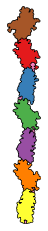

In [23]:
cartoon = protein.outline("domain")
cartoon.plot()

In this domain annotation there are short linker regions which are not part of any domain. In some cases we might want to limit the cartoon just to parts of the protein that do have a domain annotation, which can be done with the `only_annotated` option.

Outlined 7 polygons!


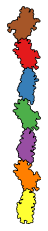

In [24]:
cartoon = protein.outline("domain", only_annotated=True)
cartoon.plot()

## 5. Interfacing directly with `matplotlib`

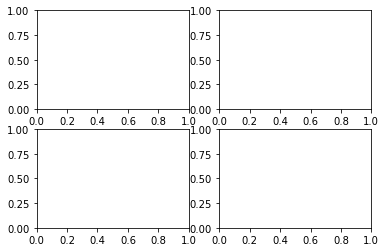

In [25]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,2)

In [26]:
protein = cellscape.Structure("ig/1igt.pdb", view=False) # don't need NGLViewer instance
protein.load_view_matrix("ig/view")
cartoon = protein.outline()

Outlined 1 polygons!


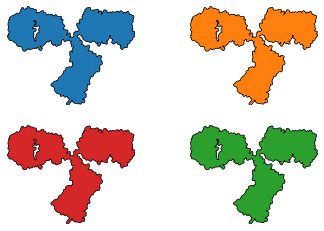

In [27]:
cartoon.plot(colors='tab:blue', axes_labels=False, axes=axes[0][0])
cartoon.plot(colors='tab:red', axes_labels=False, axes=axes[1][0])
cartoon.plot(colors='tab:orange', axes_labels=False, axes=axes[0][1])
cartoon.plot(colors='tab:green', axes_labels=False, axes=axes[1][1])
fig

## 6. Customizing visualization styles
More comprehensive documentation for the cartoon-building API is under development, but in the meantime here are some things to try in the previous examples:

* `outline(..., only_ca=True)` will build a simplified representation only using alpha carbons
* After outlining the protein by chain, as in section 3, try specifying your own chain color scheme with a Python dictionary, `plot(colors={'A':'red', 'B':'blue','C':'green','D':'purple'}`
* use `plot(colors="viridis")` to choose a region color scheme from a [matplotlib colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).
* use `plot(..., axes_labels=True)` to add labels to the Y-axis (in Angstroms)
* use `plot(..., smoothing=True)` to simplify the polygons